# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "New York")
jsondata = response.json()
print(jsondata)

{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 11.98, 'pressure': 1016, 'humidity': 93, 'temp_min': 11.11, 'temp_max': 13}, 'visibility': 11265, 'wind': {'speed': 4.1, 'deg': 50}, 'rain': {'1h': 1.33}, 'clouds': {'all': 90}, 'dt': 1571612941, 'sys': {'type': 1, 'id': 5141, 'message': 0.013, 'country': 'US', 'sunrise': 1571569929, 'sunset': 1571609345}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [51]:
jsondata["coord"]["lat"]

40.73

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
data = []
i = 0
for city in cities:
    json = requests.get(query_url + city).json()
    i = i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")



counter 1 || rikitea
city not found
counter 3 || sinnamary
counter 4 || butaritari
counter 5 || arraial do cabo
counter 6 || ushuaia
city not found
counter 8 || leningradskiy
counter 9 || buala
counter 10 || kanigoro
counter 11 || urusha
counter 12 || albany
counter 13 || mataura
counter 14 || jamestown
counter 15 || namatanai
counter 16 || hermanus
counter 17 || vaini
counter 18 || knysna
counter 19 || adrar
counter 20 || punta arenas
city not found
counter 22 || castro
counter 23 || pangody
counter 24 || namie
counter 25 || praia da vitoria
counter 26 || bluff
city not found
counter 28 || cape town
counter 29 || qaanaaq
counter 30 || baculin
counter 31 || puerto ayora
counter 32 || zeya
counter 33 || thinadhoo
counter 34 || iranshahr
city not found
city not found
counter 37 || vardo
counter 38 || marienburg
counter 39 || glace bay
counter 40 || clyde river
counter 41 || jorpeland
city not found
counter 43 || nandu
counter 44 || airai
city not found
counter 46 || thompson
counter 47 |

counter 356 || salinas
counter 357 || saint-augustin
counter 358 || dubno
counter 359 || constitucion
counter 360 || brodokalmak
counter 361 || bandundu
counter 362 || great yarmouth
counter 363 || comodoro rivadavia
counter 364 || prachuap khiri khan
counter 365 || fortuna
counter 366 || oranjemund
counter 367 || vao
counter 368 || san cristobal
counter 369 || vizinga
counter 370 || tadine
counter 371 || okha
counter 372 || san luis
counter 373 || tyumentsevo
counter 374 || kununurra
counter 375 || saint anthony
city not found
counter 377 || torbay
counter 378 || hirara
counter 379 || fomboni
counter 380 || severodvinsk
counter 381 || kabanjahe
counter 382 || kibre mengist
city not found
counter 384 || samarai
counter 385 || humberto de campos
counter 386 || talnakh
counter 387 || pangai
counter 388 || taltal
counter 389 || zyryanskoye
counter 390 || prado
counter 391 || kibala
counter 392 || stanislav
counter 393 || sosnovka
counter 394 || hereford
counter 395 || serenje
counter 396 

In [53]:
df = pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,99,PF,1571613348,70,-23.12,-134.97,21.16,6.02
1,sinnamary,65,GF,1571613349,82,5.38,-52.96,27.41,6.86
2,butaritari,1,KI,1571613350,70,3.07,172.79,29.47,5.33
3,arraial do cabo,75,BR,1571613350,68,-22.97,-42.02,22.00,4.60
4,ushuaia,40,AR,1571613350,88,-54.81,-68.31,8.00,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [54]:
date=time.strftime("%d%m%y")
date

'201019'

Text(0.5, 0, 'Latitude')

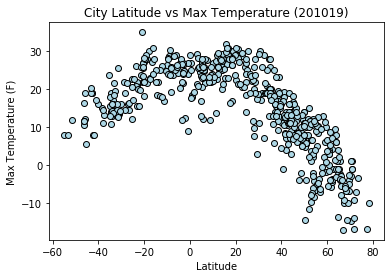

In [55]:
plt.scatter(df["Lat"], df["Max Temp"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

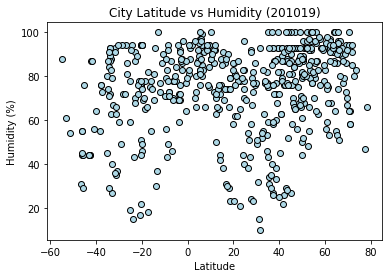

In [56]:
plt.scatter(df["Lat"], df["Humidity"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

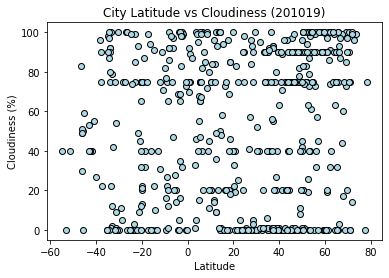

In [57]:
plt.scatter(df["Lat"], df["Cloudiness"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

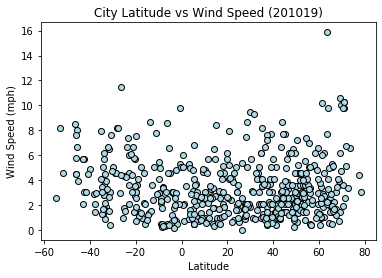

In [58]:
plt.scatter(df["Lat"], df["Wind Speed"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")